# Regularized Linear Regression

If we go on increasing the powers of input features(like the model shown with the equation below), we get more flexibility and hence the model may give 100% accuracy for training set but this may lead to overfit. 

$$ \theta_0 + \theta_1x + \theta_2x^2 + \theta_3x^3 + \theta_4x^4 $$

Regularization is used to overcome the problem of overfit. Usually the problem of overfit occurs due to large values of model parameters after training. We reduce these values of parameter by adding another term in the cost function(cosisting of parameters) so that it gets minimized as well. 

$$ min_\theta\ \dfrac{1}{2m}\  \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda\ \sum_{j=1}^n \theta_j^2 $$

In the above cost function, thetas are the parameter of the model. We added the last term so we can minimize that as well. Lambda is called the regularization parameter, it determines how much the value of parameters must be penalized. This is the basic intuition of regularization.

If we derivate the above cost function w.r.t the parameters and use gradient descent, we get the following results,

$$\begin{align*} & \text{Repeat}\ \lbrace \newline & \ \ \ \ \theta_0 := \theta_0 - \alpha\ \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_0^{(i)} \newline & \ \ \ \ \theta_j := \theta_j - \alpha\ \left[ \left( \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \right] &\ \ \ \ \ \ \ \ \ \ j \in \lbrace 1,2...n\rbrace\newline & \rbrace \end{align*}$$

Note that we dont apply regularization of the 0th parameter because we do not want to penalize $\theta_0$.

First we will create a toy dataset to demostrate this. We will first see how overfit takes place, then we will use regularization and notice the difference.

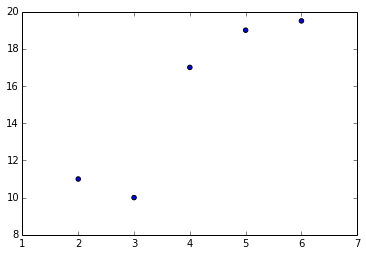

In [25]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

x = np.array([[2, 3, 4, 5, 6]]).T
y = np.array([[11, 10, 17, 19, 19.5]]).T

plt.scatter(x,y)
plt.show()

The below function returns a training set matrix which has been added with a column of ones in the begining for 0th power term in the model. The subsequent columns of this matrix are higher powers of the original training set. 

In [38]:
def init_xtrain(x,order,num_instances):
    
    x_train = np.hstack((np.ones((num_instances,1)),x))
    
    for i in range(order-1):
        x_train = np.hstack((x_train, x**(i+2)))
    
    return x_train

We will use Normal Equation method to fit the model and also to implement regularization. The normal equation without regularization for finding weights to fit out model is given as,

$$   \theta = (X^TX)^{-1} X^Ty  $$

We have also printed out the weights and we can see the magnitude is relatively larger than the regularized weights. The plot shows overfit, now we will use regularization to overcome this.

[[ 171.5       ]
 [-183.20833334]
 [  72.3125    ]
 [ -11.79166667]
 [   0.6875    ]]


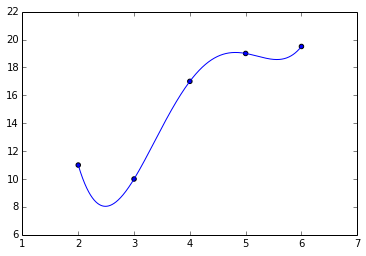

In [108]:
num_instances = x.shape[0]
order = 4

x_train = init_xtrain(x,order,num_instances)

weights = np.matmul(np.matmul(np.linalg.inv((np.matmul(x_train.T , x_train))), x_train.T), y)

x_test_series = np.asarray([np.arange(2,6,0.0001)]).T
x_test = init_xtrain(x_test_series, order,x_test_series.shape[0])
h = np.matmul(x_test, weights)

print(weights)

plt.scatter(x,y)
plt.plot(x_test_series,h)
plt.show()

For regularized linear regression, the normal equation looks like,
 
$$\begin{align*}& \theta = \left( X^TX + \lambda \cdot L \right)^{-1} X^Ty \newline& \text{where}\ \ L = \begin{bmatrix} 0 & & & & \newline & 1 & & & \newline & & 1 & & \newline & & & \ddots & \newline & & & & 1 \newline\end{bmatrix}\end{align*}$$

Here size of L is (n+1)x(n+1) where n is the order.

[[  9.04338218e+00]
 [  7.32484096e-03]
 [  4.91910942e-02]
 [  1.75514604e-01]
 [ -2.22150537e-02]]


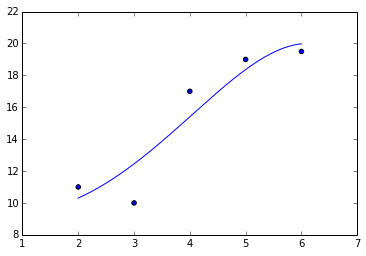

In [107]:
lamb = 100
e = np.eye(order)
L = np.hstack((np.zeros((order,1)) , e ))
L = np. vstack((np.zeros((1,order+1)), L))

weights = np.matmul(np.matmul(np.linalg.inv((np.matmul(x_train.T , x_train)) + lamb * L ), x_train.T), y)

print(weights)

x_test_series = np.asarray([np.arange(2,6,0.0001)]).T
x_test = init_xtrain(x_test_series, order,x_test_series.shape[0])
h = np.matmul(x_test, weights)

plt.scatter(x,y)
plt.plot(x_test_series,h)
plt.show()

As seen above, the weights are relatively of less magnitude and hence we get a smoother curve which is not an overfit.

## Regularization Parameter

Lambda defines as to how much the paramters should be inflated. 

If the value of lambda is very less then it is as good as saying there is no regularization at all and hence overfit takes place.

If the value of lambda is very large then parameters get inflated to a greater extent. We can see from the very first equation of this notebook if all the parameters tend to 0 only first parameter $\theta_0$ will remain leading to underfit.

# Conclusion

Here as there was only one feature, we can visualize it easily, but as number of features increases it becomes difficult to visualize the same. Hence we cant say if ovrfit is taking place by looking at the graphs. Therefore its a good practice to use regularization to avoid overfit.

However its important to select the regularization parameter carefully as a bad choice may lead to problems discussed above.

We can also add regularization to logistic regression by adding the last term to its loss function.